# Introduction

This notebook will teach one how to build a neural network using only Pandas, Numpy and matplotlib. Here one can learn the math and the code behind the tensorflow.keras framework.

# Dataset 

Since this notebook will be for education purposes one will be using the MNIST dataset (https://www.kaggle.com/competitions/digit-recognizer/data). The main objective is to create a model to recognize digits.

# Imports 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Starting

In [42]:
train = pd.read_csv('train.csv')
train = np.array(train)
# shuffling data to avoid overfitting
np.random.shuffle(train)


# geting the number of rows and columns
rows, columns = train.shape
print(rows, columns)

42000 785


In [43]:
# spliting the data
#test
train_dev = train[0:1000].T # transposing to make columns out of the rows
Y_dev = train_dev[0]
X_dev = train_dev[1:columns]
X_dev = X_dev / 255.

#train
data_train = train[1000:rows].T
Y_train = data_train[0]
X_train = data_train[1:columns]
X_train = X_train / 255.
_,m_train = X_train.shape

In [44]:
print(X_train[0].shape)
print(X_train[:,0].shape)

(41000,)
(784,)


## Defining all the functions that a neural network use

In [99]:
def init_params():
    #layer 1
    w1 = np.random.rand(50, 784) - 0.5
    b1 = np.random.rand(50, 1) - 0.5
    #layer 2
    w2 = np.random.rand(50, 50) - 0.5
    b2 = np.random.rand(50, 1) - 0.5
    #layer 3
    w3 = np.random.rand(10, 50) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2, w3, b3

def forward_propagation(w1, b1, w2, b2, w3, b3, X):
    z1 = w1.dot(X) + b1
    a1 = activation_ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = activation_ReLU(z2)
    z3 = w3.dot(a2) + b3
    a3 = activation_softmax(z3)
    return z1, a1, z2, a2, z3, a3

def backward_propagation(z1, a1, z2, a2, z3, a3, w1, w2, w3, X, Y):
    one_hot_encoded_Y = one_hot_encode(Y)
    dz3 = a3 - one_hot_encoded_Y
    dw3 = 1 / X.shape[1] * dz3.dot(a2.T)
    db3 = 1 / X.shape[1] * np.sum(dz3)
    dz2 = w3.T.dot(dz3) * activation_ReLU_deriv(z2)
    dw2 = 1 / X.shape[1] * dz2.dot(a1.T)
    db2 = 1 / X.shape[1] * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * activation_ReLU_deriv(z1)
    dw1 = 1 / X.shape[1] * dz1.dot(X.T)
    db1 = 1 / X.shape[1] * np.sum(dz1)
    return dw1, db1, dw2, db2, dw3, db3

def activation_ReLU(z):
    return np.maximum(z, 0)

def activation_softmax(z):
    a = np.exp(z) / sum(np.exp(z))
    return a

def activation_ReLU_deriv(z):
    return z > 0

def one_hot_encode(Y):
    one_hot_encoded_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_encoded_Y[np.arange(Y.size), Y] = 1
    one_hot_encoded_Y = one_hot_encoded_Y.T
    return one_hot_encoded_Y

def update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2
    w3 = w3 - alpha * dw3
    b3 = b3 - alpha * db3
    return w1, b1, w2, b2, w3, b3

    
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    w1, b1, w2, b2, w3, b3 = init_params()
    iteration_accuracy = []  # To store (iteration, accuracy) pairs

    for i in range(iterations):
        z1, a1, z2, a2, z3, a3 = forward_propagation(w1, b1, w2, b2, w3, b3, X)
        dw1, db1, dw2, db2, dw3, db3 = backward_propagation(z1, a1, z2, a2, z3, a3, w1, w2, w3, X, Y)
        w1, b1, w2, b2, w3, b3 = update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        if i % 1 == 0:
            print(f"Current Iteration: {i}")
            predictions = get_predictions(a3)
            accuracy = get_accuracy(predictions, Y)
            print(f'Current accuracy {accuracy:.2f}')
            iteration_accuracy.append((i, accuracy))

    return w1, b1, w2, b2, w3, b3, iteration_accuracy

## Results and explanations

In [100]:
w1, b1, w2, b2, w3, b3, iteration_accuracy = gradient_descent(X_train, Y_train, 0.1, 100)

Current Iteration: 0
[4 7 4 ... 4 4 4] [9 0 8 ... 4 0 5]
Current accuracy 0.07
Current Iteration: 1
[5 7 5 ... 3 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.13
Current Iteration: 2
[8 8 0 ... 0 8 6] [9 0 8 ... 4 0 5]
Current accuracy 0.15
Current Iteration: 3
[8 8 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.20
Current Iteration: 4
[8 8 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.23
Current Iteration: 5
[8 8 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.26
Current Iteration: 6
[8 8 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.28
Current Iteration: 7
[8 8 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.30
Current Iteration: 8
[8 8 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.32
Current Iteration: 9
[8 0 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.33
Current Iteration: 10
[8 0 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.35
Current Iteration: 11
[8 0 0 ... 0 8 5] [9 0 8 ... 4 0 5]
Current accuracy 0.37
Current Iteration: 12
[8 0 0 ... 0 8 5] [9 0 8 ...

After 100 epochs the model was able to achieve 0.80 accuracy.

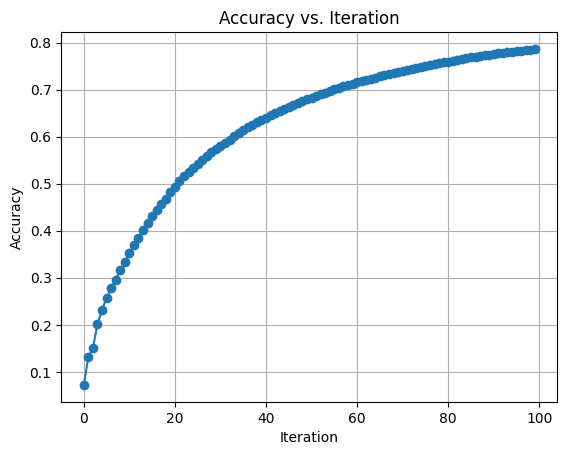

In [114]:
iterations, accuracies = zip(*iteration_accuracy)

plt.plot(iterations, accuracies, marker='o')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [76]:
def model_predict(X, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, a2 = forward_propagation(w1, b1, w2, b2, w3, b3, X)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2, w3, b3):
    current_digit_image = X_train[:, index, None]
    prediction = model_predict(X_train[:, index, None], w1, b1, w2, b2, w3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_digit_image = current_digit_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_digit_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


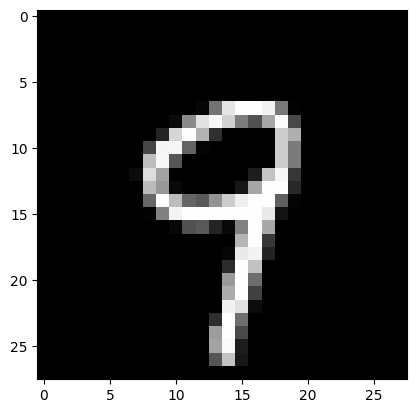

Prediction:  [0]
Label:  0


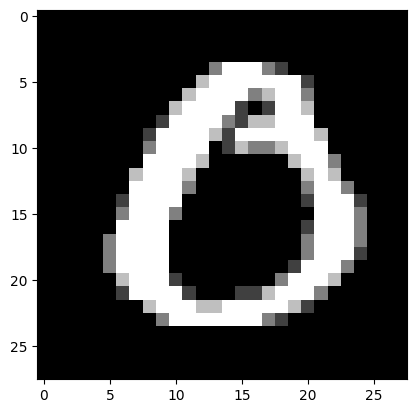

Prediction:  [8]
Label:  8


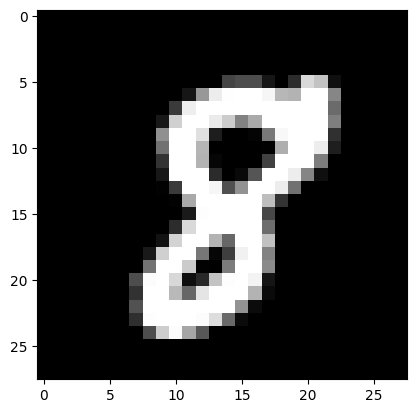

Prediction:  [8]
Label:  4


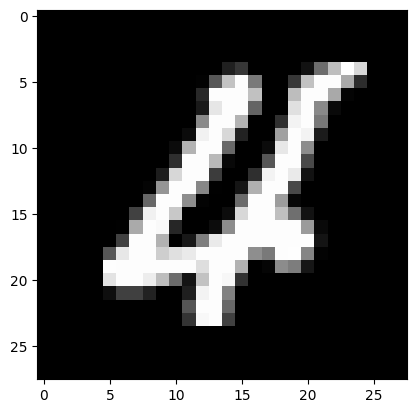

In [77]:
test_prediction(0, w1, b1, w2, b2, w3, b3)
test_prediction(1, w1, b1, w2, b2, w3, b3)
test_prediction(2, w1, b1, w2, b2, w3, b3)
test_prediction(3, w1, b1, w2, b2, w3, b3)

As expected the model was 75% correct in this test. 

# Checking if the model converged

This final test, will allow one to see if the accuracy of the model is trully what its value shows. Now the model will try to predict the data of the dev dataset, separated before.

In [79]:
dev_predictions = model_predict(X_dev, w1, b1, w2, b2, w3, b3)
get_accuracy(dev_predictions, Y_dev)

[5 7 6 2 1 7 0 2 6 4 4 7 2 2 9 6 3 6 5 2 7 9 4 2 9 3 1 8 2 2 0 8 6 5 4 4 5
 1 5 9 6 0 1 0 7 7 2 1 7 6 0 8 1 8 3 4 8 0 2 4 0 2 2 5 9 7 1 6 9 0 9 0 0 1
 4 0 5 2 4 4 3 4 2 9 4 1 1 6 1 1 4 2 9 4 0 5 9 2 7 9 8 7 2 3 7 1 0 3 1 0 4
 8 3 2 9 6 4 2 8 4 0 4 9 9 2 7 0 6 7 0 9 5 9 3 8 2 3 3 2 8 1 1 3 7 8 3 5 3
 2 0 1 1 9 1 1 0 8 4 4 1 4 8 6 7 8 9 1 5 5 0 1 8 2 4 2 5 2 8 8 7 5 8 2 8 5
 1 1 9 2 6 5 3 7 9 8 2 4 5 2 1 7 4 9 0 2 2 5 0 2 7 0 9 3 5 0 7 8 2 7 3 9 9
 9 7 1 3 5 1 8 9 6 4 7 6 9 1 1 5 5 7 0 7 0 1 5 4 6 8 1 0 3 8 4 1 9 1 1 6 0
 6 5 1 2 3 5 9 3 7 0 5 1 9 0 2 0 1 0 7 1 4 8 4 0 2 9 9 1 7 9 6 8 2 8 8 3 7
 2 8 0 8 0 8 2 4 7 6 8 8 1 9 0 7 3 1 6 4 6 6 8 4 4 4 3 6 0 0 5 7 6 1 2 8 7
 6 1 9 3 5 4 5 1 7 9 7 3 4 3 3 3 2 6 7 0 9 8 6 4 5 7 6 6 4 7 8 7 0 7 5 3 0
 6 7 1 9 8 1 8 5 5 8 4 3 9 0 1 6 7 7 2 6 8 1 7 1 8 8 5 7 2 0 7 4 9 7 8 6 1
 0 1 1 6 9 4 4 6 9 1 4 0 5 2 6 3 5 2 1 3 6 9 5 9 4 3 1 0 0 3 9 4 3 6 9 6 7
 4 0 3 1 0 9 9 4 0 6 8 0 7 1 7 0 5 5 2 9 6 5 2 2 2 1 5 8 3 6 3 1 8 7 9 2 1
 4 5 3 1 5 2 2 9 6 4 1 7 

0.787

The accuracy for a non trained data is almost equal the one from the trained data, this confirms tha the the model converged!